# Parameters

In [42]:
REGION_NAMES = ['GRASS', 'SIDEWALK', 'BUILDING', 'GRAVEL']

REFERENCE_MISSION = 2

# Imports and Functions

In [43]:
import copy
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

In [44]:
def plot_images(image_list, title_list=[], grid='off'):
    fig, axes = plt.subplots(nrows=1, ncols=len(image_list), figsize=(10*len(image_list), 10*1))
    if len(image_list) == 1:
        axes = [axes]

    for i, ax in enumerate(axes):
        ax.imshow(cv2.cvtColor(image_list[i], cv2.COLOR_BGR2RGB))
        if len(title_list) > 0:
            ax.set_title(title_list[i])
        ax.axis(grid)

In [45]:
def plot_mission_region_sample_images(mission_numbers, mission_images=[], region_images=[], sample_images=[], display_missions=True, display_regions=True, display_samples=True):
    if display_missions:
        if len(mission_images) > 0:
            print('Displaying missions')
            plot_images(mission_images, ['Mission ' + str(mission_number) for mission_number in mission_numbers])
        else:
            print('[Error] No mission images available to display')
    
    if display_regions:
        if len(region_images) > 0:
            print('Displaying regions')
            plot_images(region_images, ['Region ' + str(mission_number) for mission_number in mission_numbers])
        else:
            print('[Error] No region images available to display')
    
    if display_samples:
        if len(sample_images) > 0:
            print('Displaying samples')
            plot_images(sample_images, ['Sample ' + str(mission_number) for mission_number in mission_numbers])
        else:
            print('[Error] No sample images available to display')

In [46]:
def get_mission_file_path(mission_number):
    return '..\\missions\\mission_' + str(mission_number) + '\\mission_' + str(mission_number) + '_'

In [47]:
def get_global_image(mission_number, get_normalized=True):
    if get_normalized:
        mission = np.load(get_mission_file_path(mission_number) + 'normalized_image.npy')
    else:
        mission = np.load(get_mission_file_path(mission_number) + 'aligned_image.npy')
    
    return mission

In [48]:
def get_region_and_sample_image(mission_number, region_name, get_normalized=True):
    if get_normalized:
        region = np.load(get_mission_file_path(mission_number) + 'normalized_region_image_' + region_name + '.npy')
        sample = np.load(get_mission_file_path(mission_number) + 'normalized_sample_image_' + region_name + '.npy')
    else:
        region = np.load(get_mission_file_path(mission_number) + 'aligned_region_image_' + region_name + '.npy')
        sample = np.load(get_mission_file_path(mission_number) + 'aligned_sample_image_' + region_name + '.npy')
    
    return region, sample

# Start

In [49]:
# load mission images, region images, sample images for given missions and a region

# select mission numbers and region type
mission_numbers = [2, 3, 4, 5, 6]
region_type = 'GRASS'
get_normalized = True

In [50]:
mission_images = []
region_images = []
sample_images = []

for mission_number in mission_numbers:
    if not os.path.isdir('..\\missions\\mission_' + str(mission_number)):
        print('[Error] Mission %d directory has not been created' % (mission_number))
        break
    
    # load mission images
    mission_image = get_global_image(mission_number, get_normalized)
    mission_images.append(mission_image)
    
    # load region images and sample images
    region_image, sample_image = get_region_and_sample_image(mission_number, region_type, get_normalized)
    region_images.append(region_image)
    sample_images.append(sample_image)

# all lengths and dimensions should match
print(len(mission_images))
print(mission_images[0].shape)
print(len(region_images))
print(region_images[0].shape)
print(len(sample_images))
print(sample_images[0].shape)

5
(543, 470, 3)
5
(543, 470, 3)
5
(543, 470, 3)


Displaying missions
Displaying regions
Displaying samples


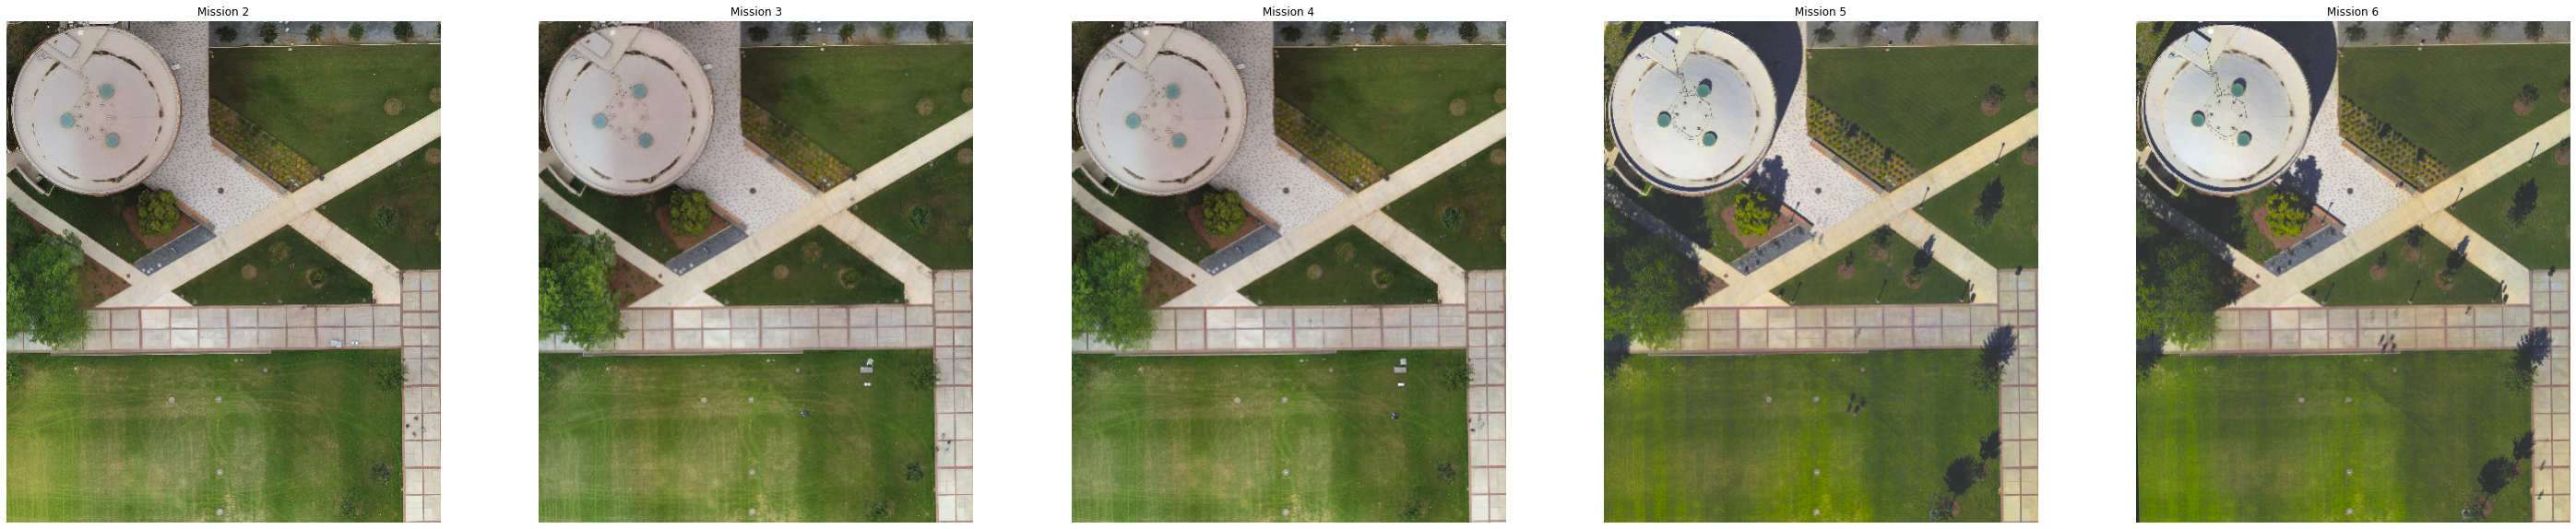

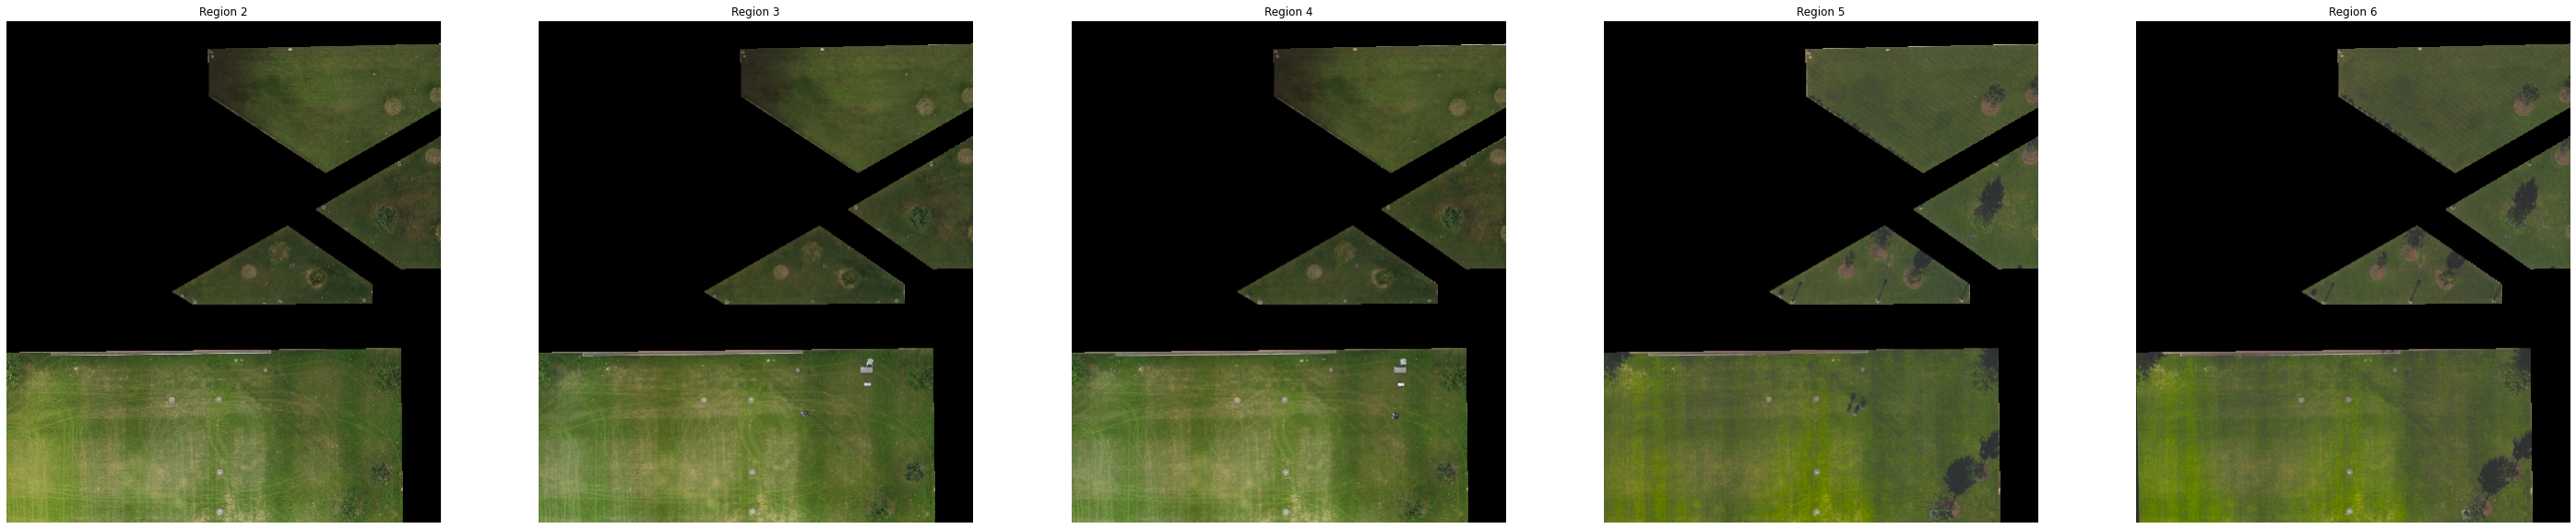

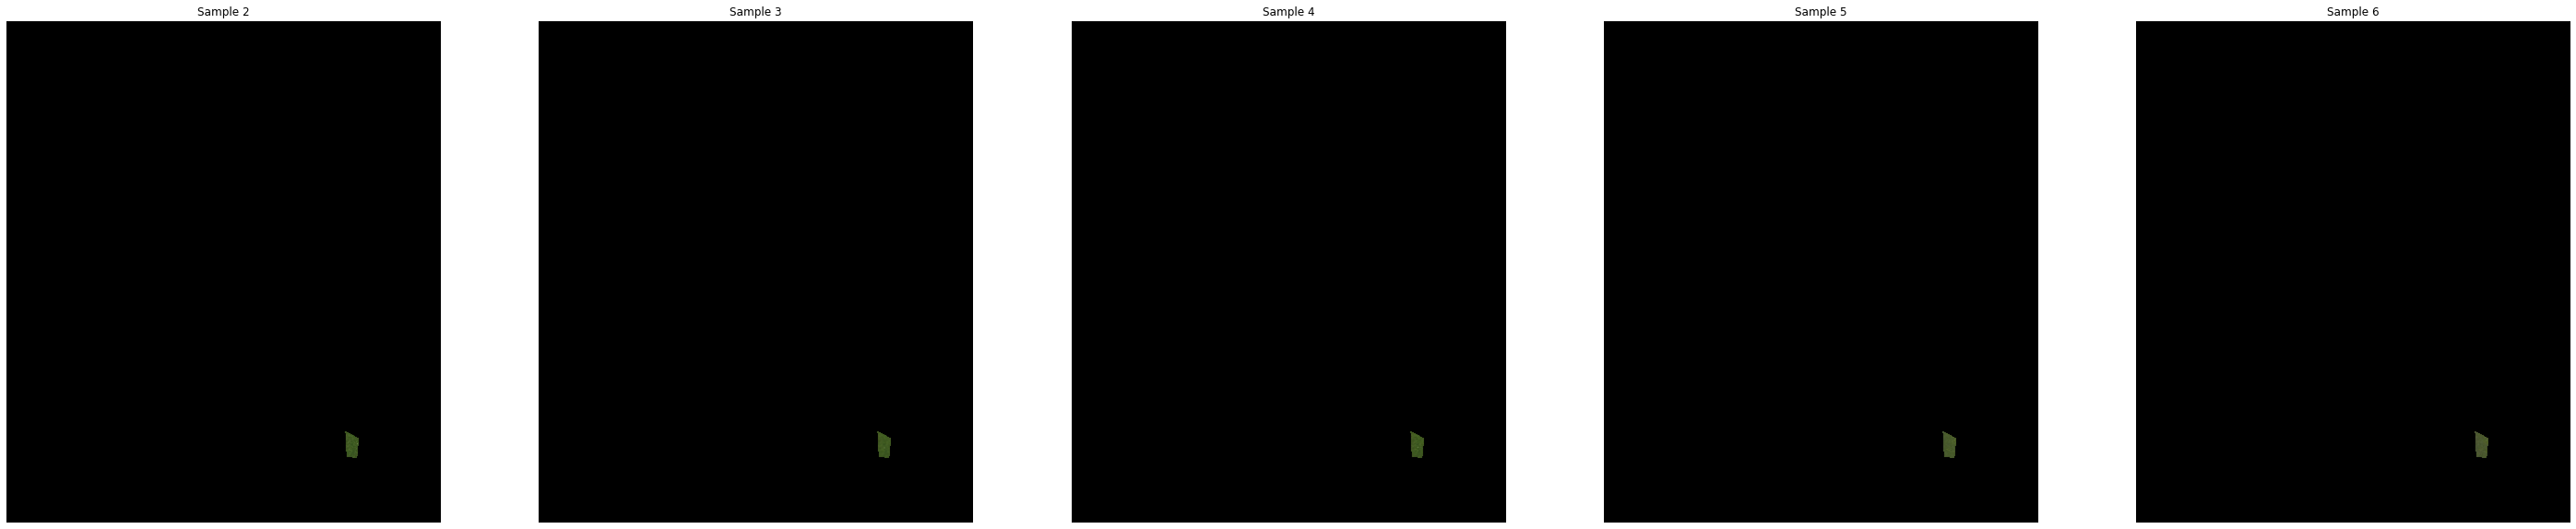

In [51]:
# display the mission images, region images, sample images
# don't change "mission_numbers, mission_images=mission_images, region_images=region_images, sample_images=sample_images"
# change "display_missions=True, display_regions=True, display_samples=True" to True or False depending on what you want displayed

plot_mission_region_sample_images(mission_numbers, mission_images=mission_images, region_images=region_images, sample_images=sample_images, display_missions=True, display_regions=True, display_samples=True)

# Image Averaging

In [74]:
# take the average
def averageImages(region_images):
    #the dimensions of these arrays are 538,470,3 the 3 represents the RGB values.
    #we just wants to take those 3 values and see how they have changed.
    #may be of some use someday https://stackoverflow.com/questions/596216/formula-to-determine-brightness-of-rgb-color
#     summedImage = copy.deepcopy(region_images[0])
    
#   ADD RGB VALUES FROM EACH IMAGE
#     for imgToAdd in region_images[1:]:
#         for i in range(0, imgToAdd.shape[0]): #iterate over y position
#             for j in range(0, imgToAdd.shape[1]): # iterate over x position   
#                 summedImage[i][j][0] += imgToAdd[i][j][0]
#                 summedImage[i][j][1] += imgToAdd[i][j][1]
#                 summedImage[i][j][2] += imgToAdd[i][j][2]
#     print(np.max(summedImage))
    
    A = np.sum(region_images, axis=0)
    print(A.shape)
                
    #ITERATE OVER THE SUMMED IMAGE AND COMPUTE AVERAGE RGB VALUES
#     for i in range(0, summedImage.shape[0]): #iterate over y position
#         for j in range(0, summedImage.shape[1]): # iterate over x position   
#                 summedImage[i][j][0] = summedImage[i][j][0] // len(region_images)
#                 summedImage[i][j][1] = summedImage[i][j][1] // len(region_images)
#                 summedImage[i][j][2] = summedImage[i][j][2] // len(region_images)
                
    A = A / len(region_images)
    A = A.astype(np.uint8)
    print(np.max(A))

    
#     averageImage = summedImage
    return A


242
(543, 470, 3)
213
(543, 470, 3)
Displaying regions


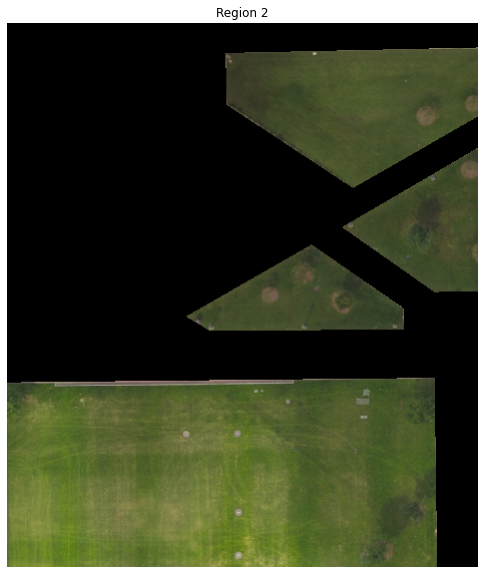

In [75]:
# display the final average image
print(np.max(region_images[0]))
imgavg = averageImages(region_images)
print(np.shape(imgavg))
plot_mission_region_sample_images(mission_numbers, mission_images=mission_images, region_images=[imgavg], sample_images=sample_images, display_missions=False, display_regions=True, display_samples=False)

In [83]:
print(np.max(imgavg))

13005.0


In [103]:
# take the average
def averageImages(region_images):
    #the dimensions of these arrays are 538,470,3 the 3 represents the RGB values.
    #we just wants to take those 3 values and see how they have changed.
    #may be of some use someday https://stackoverflow.com/questions/596216/formula-to-determine-brightness-of-rgb-color
    summedImage = copy.deepcopy(region_images[0]).astype(np.uint16)
    
#   ADD RGB VALUES FROM EACH IMAG
    for imgToAdd in region_images[1:]:
        for i in range(0, imgToAdd.shape[0]): #iterate over y position
            for j in range(0, imgToAdd.shape[1]): # iterate over x position   
                summedImage[i][j][0] += imgToAdd[i][j][0]
                summedImage[i][j][1] += imgToAdd[i][j][1]
                summedImage[i][j][2] += imgToAdd[i][j][2]
                
    #ITERATE OVER THE SUMMED IMAGE AND COMPUTE AVERAGE RGB VALUES
    for i in range(0, summedImage.shape[0]): #iterate over y position
        for j in range(0, summedImage.shape[1]): # iterate over x position   
            summedImage[i][j][0] = summedImage[i][j][0] / len(region_images)
            summedImage[i][j][1] = summedImage[i][j][1] / len(region_images)
            summedImage[i][j][2] = summedImage[i][j][2] / len(region_images)

    averageImage = summedImage.astype(np.uint8)
    return averageImage


255
(543, 470, 3)
Displaying regions


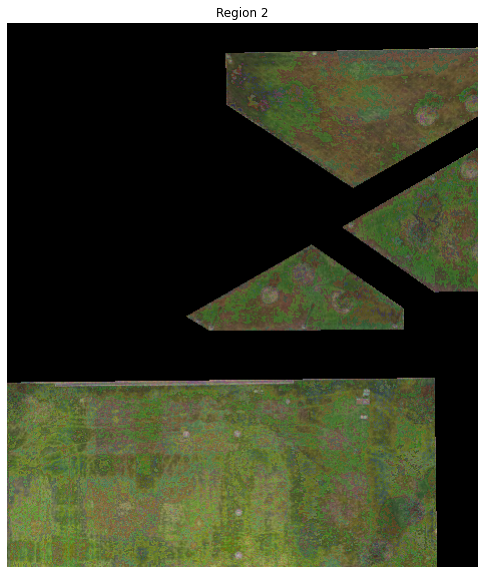

In [104]:
# display the final average image
print(np.max(region_images[0]))
imgavg = averageImages(region_images)
print(np.shape(imgavg))
plot_mission_region_sample_images(mission_numbers, mission_images=mission_images, region_images=[imgavg], sample_images=sample_images, display_missions=False, display_regions=True, display_samples=False)

# Detect Anomalies

In [33]:
adjacent_regions_diff = []

THRESHOLD = 100

for i in range(0, len(mission_numbers)-1):
    diff = cv2.cvtColor(region_images[i], cv2.COLOR_BGR2GRAY) - cv2.cvtColor(region_images[i+1], cv2.COLOR_BGR2GRAY)

    threshold_mask = diff < THRESHOLD
    diff[threshold_mask] = 0

    adjacent_regions_diff.append(diff)

NameError: name 'cv2' is not defined

In [34]:
plot_mission_region_sample_images(mission_numbers, mission_images=mission_images, region_images=adjacent_regions_diff, sample_images=sample_images, display_missions=False, display_regions=True, display_samples=False)

[Error] No region images available to display


In [35]:
# a = np.array([False,True,False])
# print(a)
# print(~a)
# print(np.logical_not(a))

# print(threshold_mask[400:410, 0:10])
# print(np.logical_not(threshold_mask[400:410, 0:10]))

In [36]:
import imutils
from skimage.measure import compare_ssim

imageA = region_images[0]
imageB = region_images[1]
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff*255).astype("uint8")
print("SSIM: {}".format(score)) # [-1, 1] 1 perfect match

ModuleNotFoundError: No module named 'imutils'

In [37]:
thresh = cv2.threshold(diff, 100, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

NameError: name 'cv2' is not defined

In [38]:
for c in cnts:
    # compute the bounding box of the contour and then draw the
    # bounding box on both input images to represent where the two
    # images differ
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(imageA, (x, y), (x+w, y+h), (0, 0, 255), 1)
    cv2.rectangle(imageB, (x, y), (x+w, y+h), (0, 0, 255), 1)

plot_images([imageA, imageB, grayA, grayB, diff, thresh], ['imageA', 'imageB', 'grayA', 'grayB', 'diff', 'thresh'])

NameError: name 'cnts' is not defined

In [39]:
# region_mask = region != [0, 0, 0]
# region_mask = region_mask.astype(np.uint8)*255
# region_mask = region_mask[:, :, 0]

# sample_mask = sample != [0, 0, 0]
# sample_mask = sample_mask.astype(np.uint8)*255
# sample_mask = sample_mask[:, :, 0]

# print(region_mask.shape)
# print(sample_mask.shape)

In [40]:
# plot_images([region_mask, sample_mask], ['region_mask', 'sample_mask'])

In [41]:
# # get pixel mean and covariance

# sample_mask_bool = np.bool_(sample_mask)

# pixel_mean = [np.mean(sample[sample_mask_bool, 0]), np.mean(sample[sample_mask_bool, 1]), np.mean(sample[sample_mask_bool, 2])]
# print(pixel_mean)

# pixel_variance = [np.var(sample[sample_mask_bool, 0]), np.var(sample[sample_mask_bool, 1]), np.var(sample[sample_mask_bool, 2])]
# print(pixel_variance)

# pixel_covariance = np.cov([sample[sample_mask_bool, 0], sample[sample_mask_bool, 1], sample[sample_mask_bool, 2]], rowvar=True)
# print(pixel_covariance)

In [42]:
# print('non zero pixels:', np.sum(region_mask)/255)
# region_mask_bool = np.bool_(region_mask)

# heatmap = np.zeros((H, W, 3))
# heatmap[region_mask_bool, :] = region[region_mask_bool, :] - pixel_mean
# heatmap[region_mask_bool, :] = heatmap[region_mask_bool, :] / pixel_variance
# print(np.min(heatmap), np.max(heatmap))

# heatmap[region_mask_bool, :] = heatmap[region_mask_bool, :] - np.min(heatmap)
# print(np.min(heatmap), np.max(heatmap))
# scale = 255/np.max(heatmap)
# heatmap[region_mask_bool, :] = heatmap[region_mask_bool, :]*scale
# print(np.min(heatmap), np.max(heatmap))


# heatmap = heatmap.astype(np.uint8)
# # heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2GRAY)
# # print(np.min(heatmap), np.max(heatmap))

# plot_images([heatmap], ['heatmap'])

In [43]:
# import seaborn as sb

# sb.heatmap(heatmap)